In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [8]:
ls "../results/bald_comparison/2025-04-23 12:26:53.584516/results"

results.pkl


In [10]:
import pickle as pk

file_path = "../results/bald_comparison/2025-04-23 12:26:53.584516/results/results.pkl"
with open(file_path, 'rb') as file:
    data = pk.load(file)

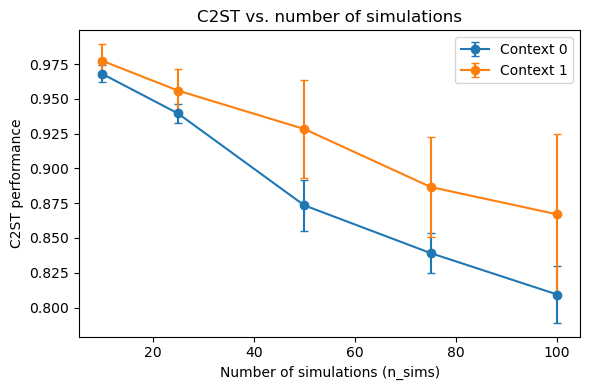

In [28]:
import torch
import matplotlib.pyplot as plt

# --- 1.  Load or create your tensor ---------------------------------
# Replace this line with: perf = torch.load('your_pickle.pkl')
perf = data        # <- stand-in; delete for real use

# --- 2.  Define the x-axis values -----------------------------------
n_sims = torch.tensor([10, 25, 50, 75, 100])

# --- 3.  Aggregate over repeats -------------------------------------
mean_perf = perf.mean(dim=0)                     # [5, 2]
std_perf  = perf.std(dim=0, unbiased=False)      # [5, 2]

# --- 4.  Plot --------------------------------------------------------
plt.figure(figsize=(6, 4))

for ctx in range(mean_perf.shape[1]):            # ctx = 0, 1
    plt.errorbar(
        n_sims.numpy(),                # x
        mean_perf[:, ctx].numpy(),     # y
        yerr=std_perf[:, ctx].numpy(), # error bar
        marker='o',
        capsize=3,                     # little hats on the bars
        label=f'Context {ctx}'
    )

plt.xlabel('Number of simulations (n_sims)')
plt.ylabel('C2ST performance')
plt.title('C2ST vs. number of simulations')
plt.legend()
plt.tight_layout()
plt.show()


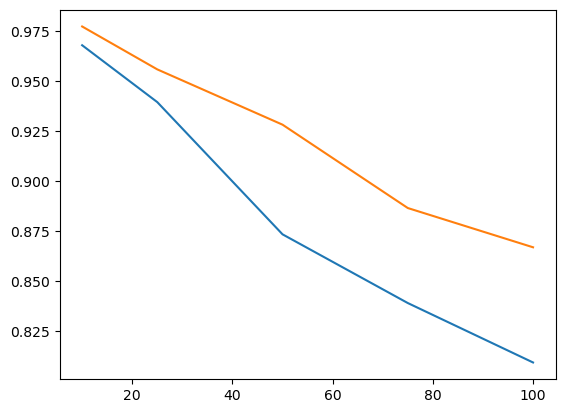

In [26]:
n_sims = [10, 25, 50, 75, 100]


fig, ax = plt.subplots()
ax.plot(n_sims, data.mean(axis=0)[:,0])
ax.plot(n_sims, data.mean(axis=0)[:,1])
plt.show()